In [24]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']


(70000,)

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

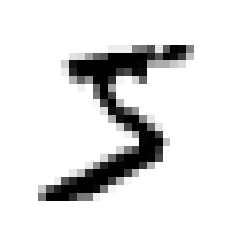

In [18]:
some_digit = X[X.index==0]
some_digit_image = some_digit.to_numpy().reshape(28,28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [21]:
y[0]

'5'

As ML algorithms expect numbers and the label is a string, the label needs to be converted to integer

In [27]:
y = y.astype('uint8')

Split data into train and test  

In [28]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [31]:
sgd_clf.predict(some_digit)

array([ True])

#### Measure accuracy using cross-validation

In [32]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

#### Confusion Matrix

In [33]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [39]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [40]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [41]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

#### Precision/Recall Trade-off

In [44]:
y_scores = sgd_clf.decision_function(some_digit)
y_scores

array([2164.22030239])

In [46]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [47]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])